# **CodSoft Machine Learning Internship**

## **Task 3: Bank Customer Churn Prediction**

### **Importing Libraries and Dataset**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## **Data Preprocessing**

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.value_counts()

RowNumber  CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
1          15634602    Hargrave    619          France     Female  42   2       0.00       1              1          1               101348.88        1         1
6671       15667932    Bellucci    758          Spain      Female  43   10      0.00       2              1          1               55313.44         0         1
6664       15766185    She         850          Germany    Male    31   4       146587.30  1              1          1               89874.82         0         1
6665       15667632    Birdseye    703          France     Female  42   7       0.00       2              0          1               72500.68         0         1
6666       15599024    Hope        506          Spain      Male    32   8       0.00       2              0          1               182692.80        0         1
                                 

In [9]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df["Age"].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

## **Data Visualization**

Text(0.5, 1.0, 'Customers by country')

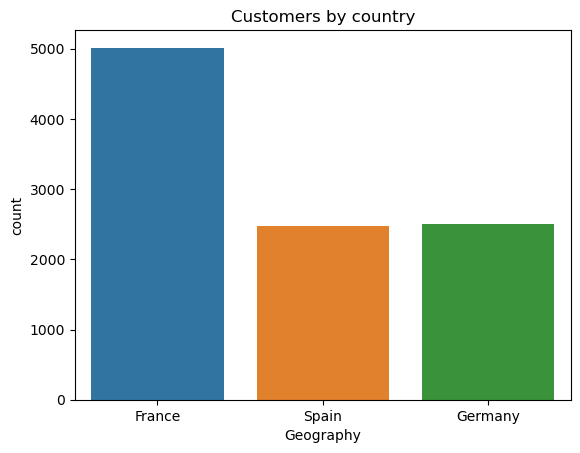

In [12]:
sns.countplot(x = "Geography", data = df)
plt.title("Customers by country")

Text(0.5, 1.0, 'Customers by country')

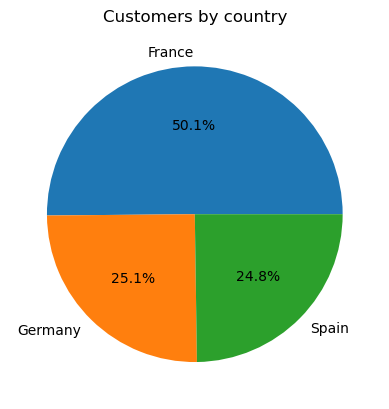

In [13]:
plt.pie(df["Geography"].value_counts(),labels = df["Geography"].value_counts().index,autopct = "%1.1f%%")
plt.title("Customers by country")

Text(0.5, 1.0, 'Male vs Female')

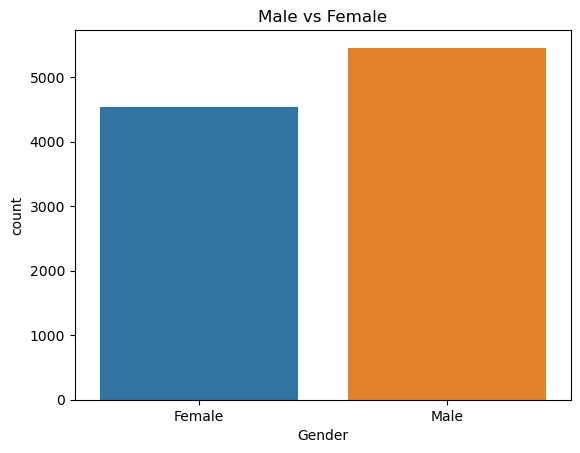

In [14]:
sns.countplot(x = "Gender",data = df)
plt.title("Male vs Female")

Text(0.5, 1.0, 'Customers by Age group')

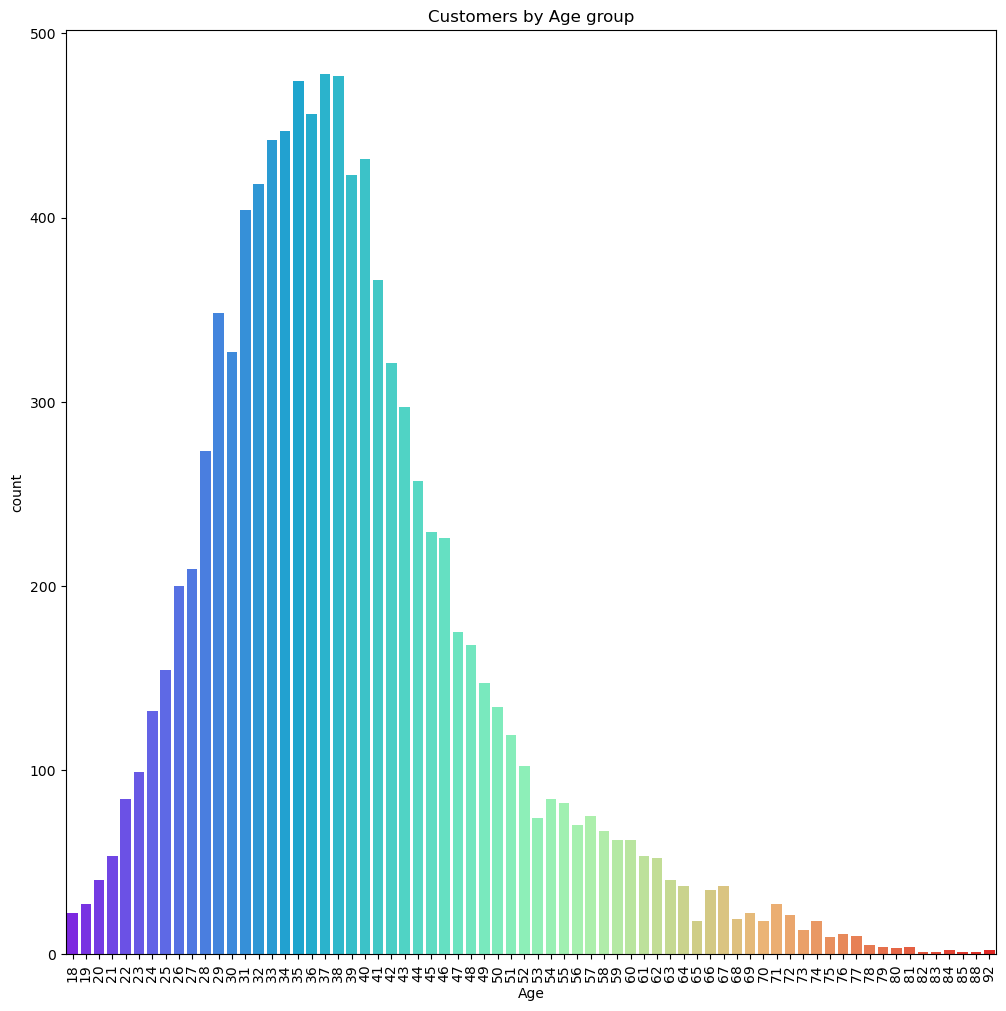

In [15]:
plt.figure(figsize = [12,12])
sns.countplot(x = "Age",data = df,palette = "rainbow")
plt.xticks(rotation = 90)
plt.title("Customers by Age group")

Text(0.5, 1.0, 'Customers by Age group(from most to least)')

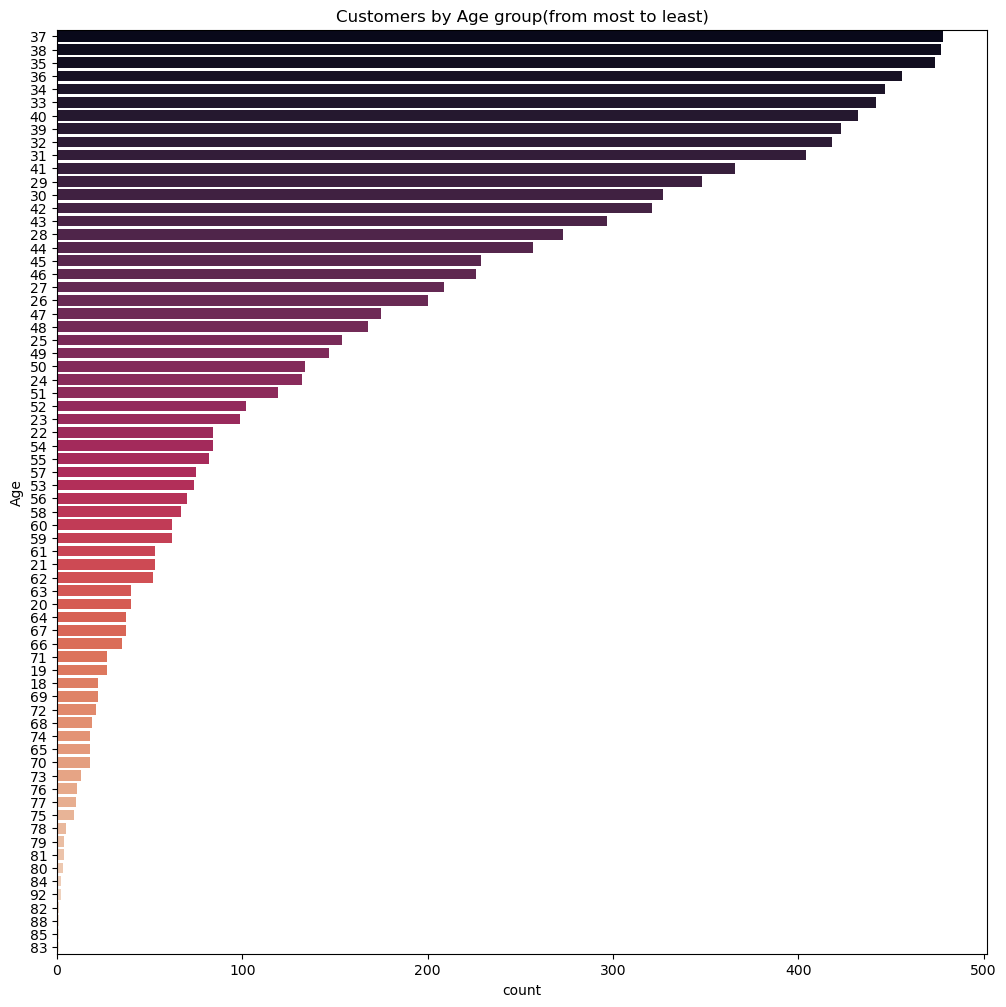

In [16]:
plt.figure(figsize = [12,12])
sns.countplot(y = "Age",data = df,order = df.Age.value_counts().index,palette = "rocket")
plt.title("Customers by Age group(from most to least)")

Text(0.5, 1.0, 'Active VS Non-Active Members')

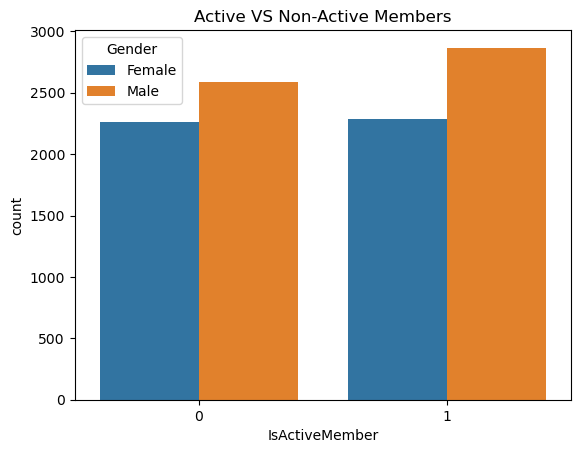

In [17]:
sns.countplot(x = "IsActiveMember",hue = "Gender", data = df)
plt.title("Active VS Non-Active Members")

Text(0.5, 1.0, 'Gender Classification by Country')

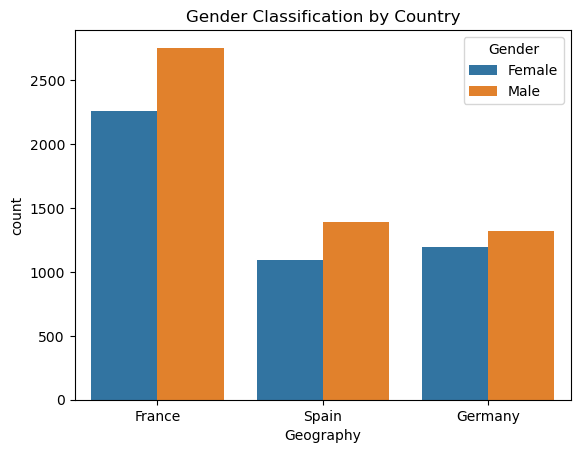

In [18]:
sns.countplot(x = "Geography",hue = "Gender", data = df)
plt.title("Gender Classification by Country")

<Axes: xlabel='Geography', ylabel='count'>

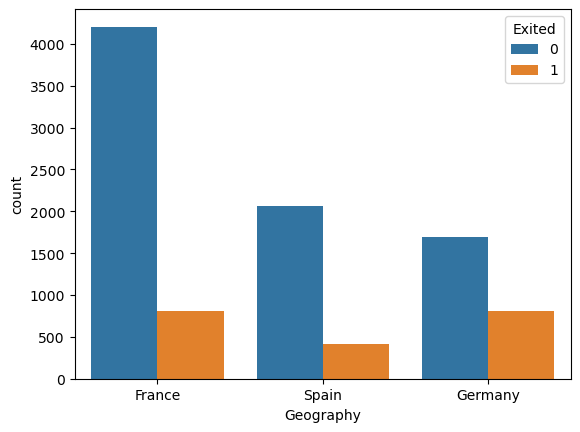

In [19]:
sns.countplot(x = "Geography",hue = "Exited", data = df)

<Axes: xlabel='HasCrCard', ylabel='count'>

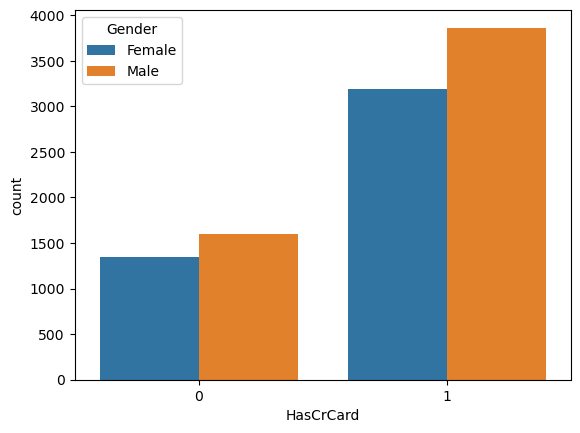

In [20]:
sns.countplot(x = "HasCrCard",hue = "Gender",data = df)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Geography"] = le.fit_transform(df["Geography"])
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [23]:
print("After Label Encoding:\nFrance = 0\nGermany = 1\nSpain = 2")

After Label Encoding:
France = 0
Germany = 1
Spain = 2


## **Model Selection and Training**

In [24]:
x = df.drop(columns = ["RowNumber","CustomerId","Surname","Tenure","Exited"])
y = df["Exited"]
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,0.00,1,1,1,101348.88
1,608,2,0,41,83807.86,1,0,1,112542.58
2,502,0,0,42,159660.80,3,1,0,113931.57
3,699,0,0,39,0.00,2,0,0,93826.63
4,850,2,0,43,125510.82,1,1,1,79084.10


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [27]:
x_train.shape,x_test.shape

((8000, 9), (2000, 9))

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### **Implementation of Logistic Regression and its accuracy**

In [51]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [52]:
reg = lr.predict(x_test)
reg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
acc = accuracy_score(y_test,reg)
print("Logistic Regression Classifier Accuracy = ",acc*100,"%")

Logistic Regression Classifier Accuracy =  77.4 %


### **Implementation of Random Forest Classifier and its accuracy**

In [54]:
rf = RandomForestClassifier(n_estimators = 100,random_state = 42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [55]:
reg2 = rf.predict(x_test)
reg2

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [56]:
acc2 = accuracy_score(y_test,reg2)
print("Random Forest Classifier Accuracy = ",acc2*100,"%")

Random Forest Classifier Accuracy =  85.05 %


### **Implementation of Gradient Boosting Classifier and its accuracy**

In [57]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [58]:
reg3 = gb.predict(x_test)
reg3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
acc3 = accuracy_score(y_test,reg3)
print("Gradient Boosting Classifier Accuracy = ",acc3*100,"%")

Gradient Boosting Classifier Accuracy =  85.25 %
